In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def PlanckFunc(T,l):
    c = 3e8
    k = 1.3806503e-23 
    h = 6.62606876e-34
    B = ((2*h*c*c)/(l**5.0))/(np.exp((h*c)/(l*k*T))-1.0)
    return B 

In [6]:
def quadraticInterpolation(x1, x2, x3, f1, f2, f3, x):
    p2 = (((x-x2)*(x-x3))/((x1-x2)*(x1-x3)))*f1 + (((x-x1)*(x-x3))/((x2-x1)*(x2-x3)))*f2 +\
         (((x-x1)*(x-x2))/((x3-x1)*(x3-x2)))*f3
    return p2

<ipython-input-2-8d31c838dbf4>:5: RuntimeWarning: overflow encountered in exp
  B = ((2*h*c*c)/(l**5.0))/(np.exp((h*c)/(l*k*T))-1.0)


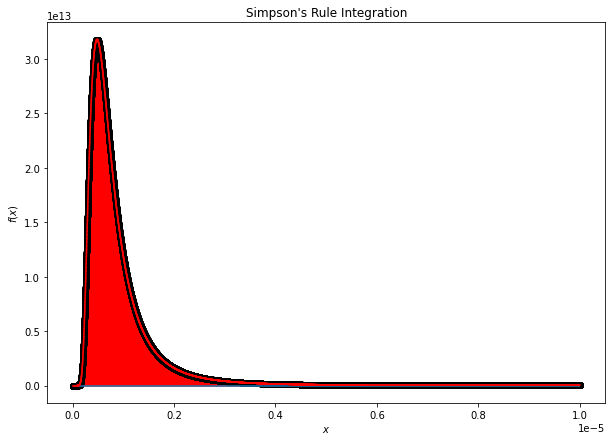

The result of the numerical integration of the discretely-sampled function
between x = 1.0e-10 and x = 1.0e-05 is I = -23344593.04402966


In [7]:
# data
T = 6000
x = np.linspace(1e-10,1e-5,10000)
f = PlanckFunc(T,x)

N = len(x)
n = N-1

plt.figure(figsize=(10,7))

# Numerical integration loop
Integral = 0.
for i in range(int((n-2)/2 +1)):
    h = x[2*i] - x[2*i+1]
    Integral = Integral + h*(f[2*i] + 4*f[2*i+1] + f[2*i+2])/3
    
    x_interval = np.linspace(x[2*i],x[2*i+2],6)
    y_interval = quadraticInterpolation(x[2*i], x[2*i+1], x[2*i+2], f[2*i], f[2*i+1], f[2*i+2], x_interval)
    plt.plot(x_interval, y_interval,'r')
    plt.fill_between(x_interval, y_interval, color='red', alpha=0.3)

plt.scatter(x, f, color='black')
plt.hlines(0, x.min(), x.max())
plt.title('Simpson\'s Rule Integration')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

print(f'The result of the numerical integration of the discretely-sampled function')
print(f'between x = {x[0]:.1e} and x = {x[len(x)-1]:.1e} is I = {Integral:.8f}')

In [11]:
Integral = -Integral
sigma = 5.670373e-8 
I = sigma*T**4/np.pi
I

23391967.76387533

In [21]:
print(f'Error is : {100*np.abs(Integral-I)/I:.1f}%')

Error is : 0.2%


<ipython-input-2-8d31c838dbf4>:5: RuntimeWarning: overflow encountered in exp
  B = ((2*h*c*c)/(l**5.0))/(np.exp((h*c)/(l*k*T))-1.0)


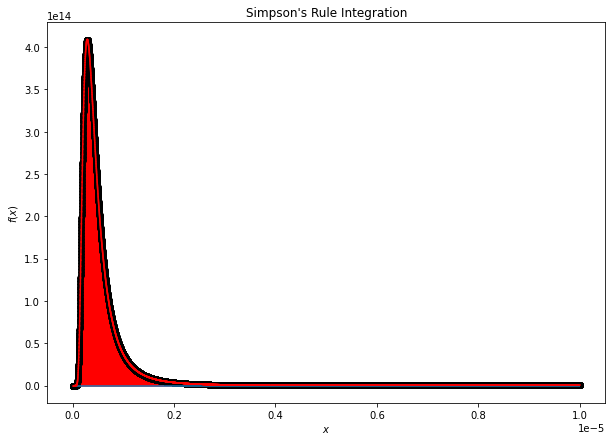

The result of the numerical integration of the discretely-sampled function
between x = 1.0e-10 and x = 1.0e-05 is I = -180218610.43654859


In [22]:
# data
T = 10000
x = np.linspace(1e-10,1e-5,10000)
f = PlanckFunc(T,x)

N = len(x)
n = N-1

plt.figure(figsize=(10,7))

# Numerical integration loop
Integral = 0.
for i in range(int((n-2)/2 +1)):
    h = x[2*i] - x[2*i+1]
    Integral = Integral + h*(f[2*i] + 4*f[2*i+1] + f[2*i+2])/3
    
    x_interval = np.linspace(x[2*i],x[2*i+2],6)
    y_interval = quadraticInterpolation(x[2*i], x[2*i+1], x[2*i+2], f[2*i], f[2*i+1], f[2*i+2], x_interval)
    plt.plot(x_interval, y_interval,'r')
    plt.fill_between(x_interval, y_interval, color='red', alpha=0.3)

plt.scatter(x, f, color='black')
plt.hlines(0, x.min(), x.max())
plt.title('Simpson\'s Rule Integration')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

print(f'The result of the numerical integration of the discretely-sampled function')
print(f'between x = {x[0]:.1e} and x = {x[len(x)-1]:.1e} is I = {Integral:.8f}')

In [23]:
Integral = -Integral
sigma = 5.670373e-8 
I = sigma*T**4/np.pi
I

180493578.42496398

In [29]:
print(f'Error is : {100*np.abs(Integral-I)/I:.2f}%')

Error is : 0.15%
